In [1]:
# ------------------------------------------------------------------------------ #
# @Author:        F. Paul Spitzner
# @Email:         paul.spitzner@ds.mpg.de
# @Created:       2023-10-09 16:50:01
# @Last Modified: 2023-10-09 16:50:04
# ------------------------------------------------------------------------------ #
# small demo of how we combined the two separate dataframes that we got from
# `analyse_all_units`, where one contained blocks 6, 8, and the other
# spontaneous activity
# Note that storing of spike-times in the dataframe via hdf5 only works
# when spikes are stored in flat numpy arrays, but not as xarrays
# -> use `utl.load_spikes(meta_df, format="numpy")`
# 
# These dataframes still need some cleaning, e.g. for cases where the estimation
# failed.
# ------------------------------------------------------------------------------ #

%reload_ext autoreload
%autoreload 2
%reload_ext ipy_dict_hierarchy
%reload_ext watermark

import logging
logging.basicConfig(
    format="%(asctime)s | %(levelname)-8s | %(name)-s | %(funcName)-s | %(message)s",
    level=logging.WARNING,
)
log = logging.getLogger("notebook")
log.setLevel("DEBUG")

import re
import glob
import h5py
import sys
import os
import numpy as np
import xarray as xr
import pandas as pd
import dask

from tqdm import tqdm


# also needs to be added for each dask-worker
extra_path = os.path.abspath('../')
sys.path.append(extra_path)
log.info(f"project directory: {extra_path}")

from ana import utility as utl
from ana import plot_helper as ph

ph.log.setLevel("DEBUG")
utl.log.setLevel("DEBUG")

data_dir = "../../../gnode/experiment_analysis/dat/"


2023-10-09 16:53:37,984 | INFO     | notebook | <module> | project directory: /Users/paul/para/2_Projects/information_timescales/repo/_latest/experiment_analysis


In [2]:
b3_df = pd.read_hdf(f"{data_dir}/all_units_no_merging_block_3_spont_final.h5", key="meta_df")
b3_df.set_index(['unit_id', 'stimulus', 'session', 'block'], inplace=True)
b6_df = pd.read_hdf(f"{data_dir}/all_units_no_merging_block_6_8_final.h5", key="meta_df")
b6_df.set_index(['unit_id', 'stimulus', 'session', 'block'], inplace=True)

meta_df = pd.concat([b3_df, b6_df], axis=0)
meta_df.to_hdf(f"{data_dir}/all_units_no_merging_all.h5", key="meta_df")

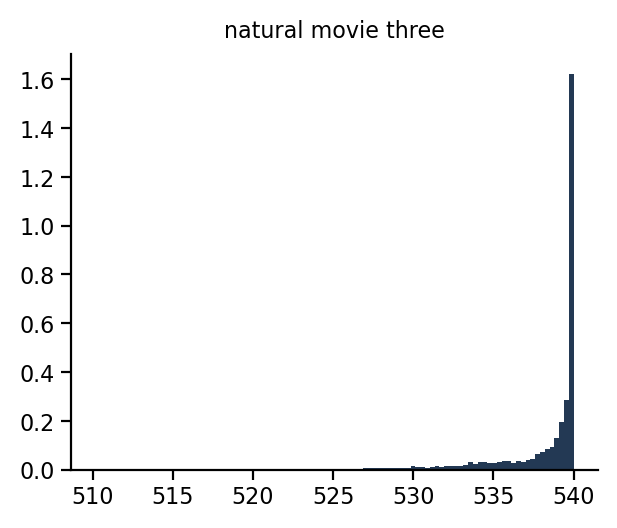

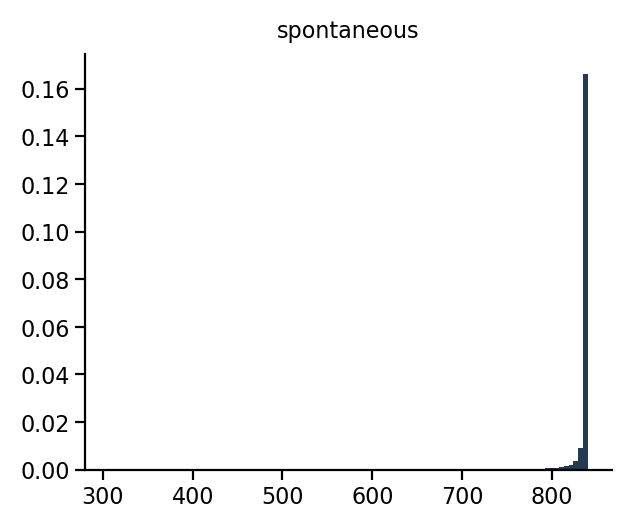

In [9]:
# some quick checks to see that the spike-preprocessing worked as expected

# we cannot simply use the recording length column, because we preprocessed
# spike-times and clipped them, but recording legnth was not updated.
fig, ax = plt.subplots()
last_spikes = []
for i in meta_df.query("stimulus == 'natural_movie_three'").iterrows():
    last_spikes.append(i[1]["spiketimes"][-1])
ax.hist(last_spikes, bins=100, density=True);
ax.set_title("natural movie three");

fig, ax = plt.subplots()
last_spikes = []
for i in meta_df.query("stimulus == 'spontaneous'").iterrows():
    last_spikes.append(i[1]["spiketimes"][-1])
ax.hist(last_spikes, bins=100, density=True);
ax.set_title("spontaneous");

# ~ 600s for natural movie three
# ~ 900s for spontaneous


In [11]:
%watermark -v --iversions

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

numpy         : 1.24.4
logging       : 0.5.1.2
pandas        : 2.0.3
matplotlib    : 3.7.2
re            : 2.2.1
sys           : 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 18:08:41) [Clang 15.0.7 ]
h5py          : 3.9.0
sqlite3       : 2.6.0
IPython       : 8.14.0
prompt_toolkit: 3.0.39
xarray        : 2023.7.0
dask          : 2023.7.1

